In [58]:
import numpy as np
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt

In [59]:
# extract ohlc and volume from loaded data
df1 = pd.read_csv('onchain_data_new.csv', parse_dates=True)

df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d')
df1 = df1.set_index(pd.DatetimeIndex(df1['timestamp'].values)).drop('timestamp',axis=1)

high = df1['price-ohlc-usd-h']
low = df1['price-ohlc-usd-l']
close = df1['price-ohlc-usd-c']
_open = df1['price-ohlc-usd-o']
volume = df1['total-transfer-volume-within-exchanges-btc-all-exchanges']
df = pd.DataFrame([_open, high, low, close, volume]).transpose()
df

,price-ohlc-usd-o,price-ohlc-usd-h,price-ohlc-usd-l,price-ohlc-usd-c,total-transfer-volume-within-exchanges-btc-all-exchanges
2012-12-13,13.699218,13.721183,13.625965,13.691131,102.260516
2012-12-14,13.731666,13.731666,13.625129,13.684013,156.525565
2012-12-15,13.547075,13.600702,13.526673,13.531920,19.894541
2012-12-16,13.514511,13.592864,13.492798,13.563107,18.828845
2012-12-17,13.360134,13.403722,13.328359,13.342400,482.850819
...,...,...,...,...,...
2023-06-20,26821.524164,26965.917497,26798.268322,26965.917497,182706.598247
2023-06-21,28331.725994,28454.557889,28283.410779,28454.557889,160741.743588
2023-06-22,30038.303054,30219.049088,29931.410713,30101.222028,175260.274571
2023-06-23,29912.159413,30029.785335,29912.159413,30021.370011,157187.448906


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


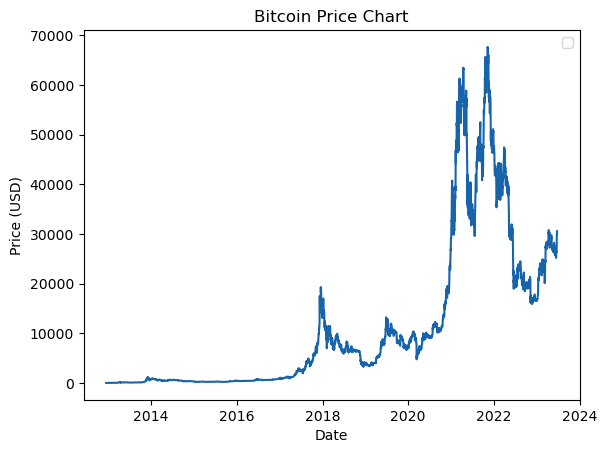

In [60]:
# plot the closing price
plt.plot(df.index, df['price-ohlc-usd-c'], color=cm.get_cmap('Blues')(0.8), linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Chart')
plt.legend()
plt.show()

In [61]:
TA_dir = ta.get_function_groups()
TA_types = list(TA_dir.keys())
indicators_types = ['Cycle Indicators','Momentum Indicators', 'Pattern Recognition', 'Volatility Indicators',
                    'Volume Indicators', 'Overlap Studies']

In [62]:
TA_dir[indicators_types[3]]

['ATR', 'NATR', 'TRANGE']

In [63]:
for attr in TA_dir[indicators_types[0]]:
    if len(getattr(ta,attr)(close)) == 2:
        df[attr+str(1)] = getattr(ta,attr)(close)[0]
        df[attr+str(2)] = getattr(ta,attr)(close)[1]
    else:
        df[attr] = getattr(ta,attr)(close)

In [64]:
MI = TA_dir[indicators_types[1]]
df[MI[0]] = ta.ADX(high, low, close, timeperiod=14)
df[MI[1]] = ta.ADXR(high, low, close, timeperiod=14)
df[MI[2]] = ta.APO(close, fastperiod=12, slowperiod=26, matype=0)
df[MI[3]+'DOWN'] = ta.AROON(high, low, timeperiod=14)[0]
df[MI[3]+'UP'] = ta.AROON(high, low, timeperiod=14)[1]
df[MI[4]] = ta.AROONOSC(high, low, timeperiod=14)
df[MI[5]] = ta.BOP(_open, high, low, close)
df[MI[6]] = ta.CCI(high, low, close, timeperiod=14)
df[MI[7]] = ta.CMO(close, timeperiod=14)
df[MI[8]] = ta.DX(high, low, close, timeperiod=14)
df[MI[9]] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)[0]
df[MI[9]+'SIGNAL'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)[1]
df[MI[9]+'HIST'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)[2]
df[MI[10]] = ta.MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)[0]
df[MI[10]+'SIGNAL'] = ta.MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)[1]
df[MI[10]+'HIST'] = ta.MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)[2]
df[MI[11]] = ta.MACDFIX(close, signalperiod=9)[0]
df[MI[11]+'SIGNAL'] = ta.MACDFIX(close, signalperiod=9)[1]
df[MI[11]+'HIST'] = ta.MACDFIX(close, signalperiod=9)[2]
df[MI[12]] = ta.MFI(high, low, close, volume, timeperiod=14)
df[MI[13]] = ta.MINUS_DI(high, low, close, timeperiod=14)
df[MI[14]] = ta.MINUS_DM(high, low, timeperiod=14)
df[MI[15]] = ta.MOM(close, timeperiod=10)
df[MI[16]] = ta.PLUS_DI(high, low, close, timeperiod=14)
df[MI[17]] = ta.PLUS_DM(high, low, timeperiod=14)
df[MI[18]] = ta.PPO(close, fastperiod=12, slowperiod=26, matype=0)
df[MI[19]] = ta.ROC(close, timeperiod=10)
df[MI[20]] = ta.ROCP(close, timeperiod=10)
df[MI[21]] = ta.ROCR(close, timeperiod=10)
df[MI[22]] = ta.ROCR100(close, timeperiod=10)
df[MI[23]] = ta.RSI(close, timeperiod=14)
df[MI[24]+'-SLOWK'] = ta.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[0]
df[MI[24]+'-SLOWD'] = ta.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[1]
df[MI[25]+'-FASTK'] = ta.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)[0]
df[MI[25]+'-FASTD'] = ta.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)[1]
df[MI[26]+'-FASTK'] = ta.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[0]
df[MI[26]+'-FASTD'] = ta.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[1]
df[MI[27]] = ta.TRIX(close, timeperiod=30)
df[MI[28]] = ta.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
df[MI[29]] = ta.WILLR(high, low, close, timeperiod=14)

In [65]:
for attr in TA_dir[indicators_types[2]]:
    if attr in ['CDLABANDONEDBABY', 'CDLDARKCLOUDCOVER', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR']:
        df[attr] = getattr(ta,attr)(_open, high, low, close, penetration=0)
    else:
        df[attr] = getattr(ta,attr)(_open, high, low, close)

C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\612604260.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr] = getattr(ta,attr)(_open, high, low, close)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\612604260.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr] = getattr(ta,attr)(_open, high, low, close)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\612604260.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [66]:
for attr in TA_dir[indicators_types[3]]:
    if attr == 'TRANGE':
        df[attr] = getattr(ta,attr)(high, low, close)
    else:
        df[attr] = getattr(ta,attr)(high, low, close, timeperiod=14)

C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\605019101.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr] = getattr(ta,attr)(high, low, close, timeperiod=14)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\605019101.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr] = getattr(ta,attr)(high, low, close, timeperiod=14)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\605019101.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [67]:
VI = TA_dir[indicators_types[4]]
df[VI[0]] = ta.AD(high, low, close, volume)
df[VI[1]] = ta.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
df[VI[2]] = ta.OBV(close, volume)

C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1641210122.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[VI[0]] = ta.AD(high, low, close, volume)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1641210122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[VI[1]] = ta.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1641210122.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

In [68]:
OS = TA_dir[indicators_types[5]]
df[OS[0]+'-upperband'] = ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0]
df[OS[0]+'-middleband'] = ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[1]
df[OS[0]+'-lowerband'] = ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[2]
df[OS[1]] = ta.DEMA(close, timeperiod=30)
df[OS[2]] = ta.EMA(close, timeperiod=30)
df[OS[3]] = ta.HT_TRENDLINE(close)
df[OS[4]] = ta.KAMA(close, timeperiod=30)
df[OS[5]] = ta.MA(close, timeperiod=30, matype=0)
df[OS[6]+'-mama'] = ta.MAMA(close, fastlimit=0.5, slowlimit=0.05)[0]
df[OS[6]+'-fama'] = ta.MAMA(close, fastlimit=0.5, slowlimit=0.05)[1]
#df[OS[7]] = ta.MAVP(close, periods, minperiod=2, maxperiod=30, matype=0)
df[OS[8]] = ta.MIDPOINT(close, timeperiod=14)
df[OS[9]] = ta.MIDPRICE(high, low, timeperiod=14)
df[OS[10]] = ta.SAR(high, low, acceleration=0, maximum=0)
df[OS[11]] = ta.SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
df[OS[12]] = ta.SMA(close, timeperiod=30)
df[OS[13]] = ta.T3(close, timeperiod=5, vfactor=0)
df[OS[14]] = ta.TEMA(close, timeperiod=30)
df[OS[15]] = ta.TRIMA(close, timeperiod=30)
df[OS[16]] = ta.WMA(close, timeperiod=30)

C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1710060188.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[OS[0]+'-upperband'] = ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0]
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1710060188.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[OS[0]+'-middleband'] = ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[1]
C:\Users\oao8xf\AppData\Local\Temp\ipykernel_2408\1710060188.py:4: PerformanceWarning: DataFrame is highly fragmented.  This 

In [69]:
#?ta.OBV
#df[df.index >= '2014-09-17']
df = df.dropna()

df.to_csv('TA_data.csv', index=True)

In [70]:
# drop the specified columns from df
df_dropped = df.drop(['price-ohlc-usd-o','price-ohlc-usd-h','price-ohlc-usd-l','price-ohlc-usd-c',
                      'total-transfer-volume-within-exchanges-btc-all-exchanges'], axis=1)

In [71]:
# concatenate the two DataFrames
all_data = pd.concat([df1, df_dropped], axis=1).dropna()

# print the resulting DataFrame
all_data

,90d-coin-days-destroyed-cdd-90,adjusted-circulating-supply-btc,adjusted-sopr-a-sopr,aggregate-security-spend-thermocap-usd,average-coin-dormancy,average-spent-output-lifespan-asol,balance-on-exchanges-stacked-btc-bitfinex,balance-on-exchanges-stacked-btc-bitstamp,balance-on-exchanges-stacked-btc-coinbase,balance-on-exchanges-total-btc-all-exchanges,...,MAMA-fama,MIDPOINT,MIDPRICE,SAR,SAREXT,SMA,T3,TEMA,TRIMA,WMA
2013-03-11,373811.330843,1.088579e+07,1.091349,4.554086e+07,6.897077,29.790940,3722.152664,12910.748448,14.998683,1.664790e+04,...,33.029400,38.370000,38.340000,13.051932,13.051932,31.825924,37.816047,42.812506,31.066070,35.215274
2013-03-12,374944.809714,1.088916e+07,1.046725,4.569146e+07,5.595904,23.430094,3127.744227,14003.465233,15.727947,1.714694e+04,...,33.232006,39.338814,39.525000,13.051932,13.051932,32.638512,39.168831,44.411909,31.748480,36.250868
2013-03-13,373289.189921,1.089309e+07,1.082827,4.587223e+07,5.210122,26.201786,2767.967585,12150.548805,17.767793,1.493628e+04,...,35.715261,39.905316,39.780000,13.051932,13.051932,33.353392,40.415544,45.285721,32.465975,37.061056
2013-03-14,374957.295653,1.089756e+07,1.071659,4.608413e+07,6.283942,21.440024,2698.175985,13063.829709,15.884015,1.577789e+04,...,35.906286,40.565079,40.751265,13.051932,13.051932,34.119812,41.551105,46.334421,33.222845,37.940837
2013-03-15,378181.537858,1.090186e+07,1.071577,4.628681e+07,1.348285,19.094431,2852.254206,13264.179555,16.200679,1.613263e+04,...,36.097003,41.058814,41.245000,13.051932,13.051932,34.838060,42.558546,47.199264,34.013859,38.767301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,113777.202541,1.487635e+07,0.999152,4.892326e+10,21.698483,28.251357,319626.181443,14716.295710,462769.409590,2.286672e+06,...,26228.655268,26199.640000,26192.249913,13.051932,13.051932,26609.061447,26084.997801,25912.381962,26657.365189,26416.781062
2023-06-21,115940.094282,1.487590e+07,1.032519,4.894541e+10,37.659274,32.019955,319329.261218,13892.434046,461854.014226,2.283981e+06,...,26237.454969,26819.201748,26771.548439,13.051932,13.051932,26669.066740,26214.846942,26323.931326,26613.793924,26535.845348
2023-06-22,115436.620895,1.487496e+07,1.029398,4.897119e+10,15.169519,32.701624,315864.267764,14494.191714,461889.034110,2.277019e+06,...,26763.324393,27642.533817,27653.794039,13.051932,13.051932,26777.458702,26482.131525,26984.800575,26586.262217,26757.274722
2023-06-23,118428.877657,1.487513e+07,1.030853,4.899490e+10,50.301580,32.400259,315463.559745,14068.844159,463382.224548,2.273703e+06,...,26804.865146,27642.533817,27653.794039,13.051932,13.051932,26873.213269,26851.924624,27549.328538,26572.281132,26966.559322


In [72]:
all_data.to_csv('all_data.csv', index=True)